<a href="https://colab.research.google.com/github/cowsilver57/sessac_test/blob/main/11%EC%9B%94_20%EC%9D%BC_(%EC%9B%94)_Day_53_%EC%8B%A4%EC%8A%B51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 1

## 전체 정답 코드

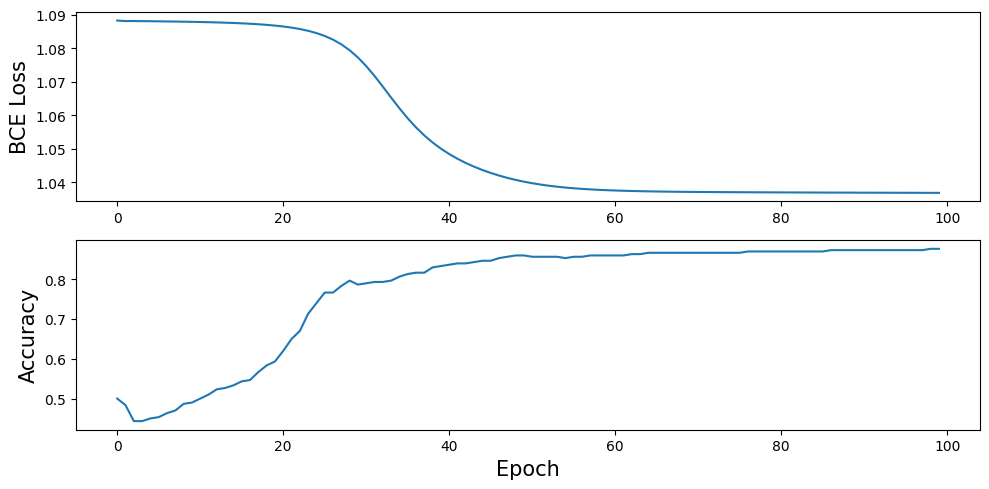

In [ ]:
#1.
import torch
from sklearn.datasets import make_moons
from torch.utils.data import TensorDataset, DataLoader

N_SAMPLES = 300
BATCH_SIZE = 8
LR = 0.1

X, y = make_moons(n_samples=N_SAMPLES, noise=0.2)
dataset = TensorDataset(torch.FloatTensor(X), torch.FloatTensor(y))
data_loader = DataLoader(dataset=dataset, batch_size=BATCH_SIZE)

#2.
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()

        self.fc1 = nn.Linear(in_features=2, out_features=5)
        self.fc1_act = nn.Sigmoid()

        self.fc2 = nn.Linear(in_features=5, out_features=4)
        self.fc2_act = nn.Sigmoid()

        self.fc3 = nn.Linear(in_features=4, out_features=1)
        self.fc3_act = nn.Sigmoid()

    def forward(self,x):
        x = self.fc1(x)
        x = self.fc1_act(x)

        x = self.fc2(x)
        x = self.fc2_act(x)

        x = self.fc3(x)
        x = self.fc3_act(x)
        return x

#3.
from torch.optim import SGD
if torch.cuda.is_available(): DEVICE = 'cuda'
elif torch.backends.mps.is_available(): DEVICE = 'mps'
else: DEVICE = 'cpu'

model = MLP().to(DEVICE)
loss_function = nn.BCELoss()
optimizer = SGD(model.parameters(), lr=LR)

#4.
EPOCHS = 100
losses, accs = [],[]
for epoch in range(EPOCHS):
    epoch_loss, n_corrects = 0.,0
    for X, y in data_loader:
        X, y = X.to(DEVICE), y.to(DEVICE)

        pred = model(X)
        y = y.reshape(pred.shape)
        loss = loss_function(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() + len(X)
        pred = (pred>0.5).type(torch.float)
        n_corrects += (pred==y).sum().item()

    epoch_loss /= N_SAMPLES
    losses.append(epoch_loss)
    epoch_acc = n_corrects / N_SAMPLES
    accs.append(epoch_acc)

    #print(f"Epoch: {epoch+1}")
    #print(f"Losss: {epoch+loss:.4f} - ACC: {epoch_acc:.4f}\n")

#5.
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 5))
axes[0].plot(losses)
axes[1].plot(accs)
axes[1].set_xlabel("Epoch", fontsize=15)
axes[0].set_ylabel("BCE Loss", fontsize=15)
axes[1].set_ylabel("Accuracy", fontsize=15)
axes[0].tick_params(labelsize=10)
axes[1].tick_params(labelsize=10)
fig.tight_layout()
plt.show()

## 함수 생성하기

In [ ]:
#함수 생성하기
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_moons
import torch.nn as nn
from torch.optim import SGD

#get_dataset 함수
def get_dataset(N_SAMPLES, BATCH_SIZE):
    X, y = make_moons(N_SAMPLES, noise=0.2)
    dataset = TensorDataset(torch.FloatTensor(X), torch.FloatTensor(y))
    dataloader = DataLoader(dataset=dataset, batch_size=BATCH_SIZE)
    return dataloader

#get_device 함수
def get_device():
    return 'cuda' if torch.cuda.is_available() else 'cpu'

#MLP Model 선언
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()

        self.fc1 = nn.Linear(in_features=2, out_features=5)
        self.fc1_act = nn.Sigmoid()

        self.fc2 = nn.Linear(in_features=5, out_features=4)
        self.fc2_act = nn.Sigmoid()

        self.fc3 = nn.Linear(in_features=4, out_features=1)
        self.fc3_act = nn.Sigmoid()

    def forward(self,x):
        x = self.fc1(x)
        x = self.fc1_act(x)

        x = self.fc2(x)
        x = self.fc2_act(x)

        x = self.fc3(x)
        x = self.fc3_act(x)
        return x

#train 함수
def train(dataloader, N_SAMPLES, model, loss_function, optimizer, device):
    model.train()
    epoch_loss, n_corrects = 0.,0

    for X, y in dataloader:
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        pred = model(X)
        y = y.reshape(pred.shape)
        loss = loss_function(pred, y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * len(X)
        pred = (pred > 0.5).type(torch.float)
        n_corrects += (pred == y).sum().item()

    epoch_loss /= N_SAMPLES
    epoch_acc = n_corrects / N_SAMPLES

    return epoch_loss, epoch_acc

#vis_losses_accs 함수
def vis_losses_accs(losses, accs):
    fig, axes = plt.subplots(2, 1, figsize=(10, 5))
    axes[0].plot(losses)
    axes[1].plot(accs)
    axes[1].set_xlabel("Epoch", fontsize=15)
    axes[0].set_ylabel("BCE Loss", fontsize=15)
    axes[1].set_ylabel("Accuracy", fontsize=15)
    axes[0].tick_params(labelsize=10)
    axes[1].tick_params(labelsize=10)
    fig.tight_layout()
    plt.show()

## 최종 깔끔한 코드

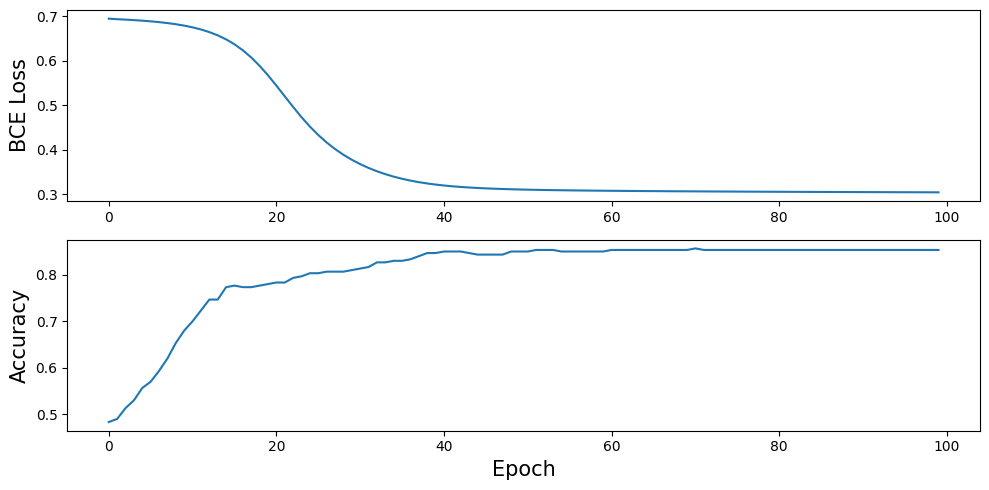

In [ ]:
import torch.nn as nn
from torch.optim import SGD

N_SAMPLES = 300
BATCH_SIZE = 8
EPOCHS = 100
LR = 0.1
DEVICE = get_device()

dataloader = get_dataset(N_SAMPLES, BATCH_SIZE)

model = MLP().to(DEVICE)
loss_function = nn.BCELoss()
optimizer = SGD(model.parameters(), lr=LR)

losses, accs = [], []
for epoch in range(EPOCHS):
    epoch_loss, epoch_acc = train(dataloader, N_SAMPLES, model, loss_function, optimizer, DEVICE)

    losses.append(epoch_loss)
    accs.append(epoch_acc)

    #print(f"Epoch: {epoch+1}")
    #print(f"Koss: {epoch_loss:.4f} - Acc:{epoch_acc:.4f}\n")

vis_losses_accs(losses, accs)